## error_correction package tutorial
Authors: Gloria Ha and Paul Dieterle

Description: With this package we can infer parameters for different models of error generation in spindle assembly.

Last updated: 4/14/2020

In [2]:
from error_correction import data_io
from error_correction.model import logLikeIndDelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For this tutorial we will focus on the most basic, "independent model."  We can denote $N$ as the number of chromosomes in each cell.  In this model, each chromosome has an equal low probability, $p$, of missegregation in a single division.  In this case, the probability of $M$ missegregations is given by

\begin{equation*}
    P(M) = {N\choose M}p^M(1-p)^{N-M}.
\end{equation*}

The experimental quantity being measured is the number of chromatids in each daughter cell after a single division. In particular, we are looking to calculate the distribution of \textit{differences} in chromatid counts between the two daughter cells. We assume the $M$ chromosomes that missegregate fall into either daughter cell with equal probability. This gives $Q_1$ full chromosomes in daughter cell 1, meaning that daughter cell 1 has a number of chromatids $N_1$ given by

\begin{equation*}
     N_1 = N-M+2Q_1(M),
\end{equation*}

where $Q_1(M)$ is a random variable distributed according to

\begin{equation*}
     P(Q_1) = {M\choose Q_1}2^{-Q_1}2^{-(M-Q_1)} = {M\choose Q_1}2^{-M}.
\end{equation*}

From this, we can deduce that the distribution of $N_1$ is a simple convolution given by

\begin{equation*}
     P(N_1) = \sum_{M=0}^NP(M)P\left(Q_1 = \frac{N_1-N+M}{2}\right) = \sum_{M=0}^N{N\choose M}{M\choose \frac{N_1-N+M}{2}}2^{-M}p^M(1-p)^{N-M},
\end{equation*}

which tells us as well that the distribution of \textit{differences} in chromatid counts,

\begin{equation*}
    P(\Delta = |N_1-N_2| = 2|N_1-N|),
\end{equation*}

is given by

\begin{equation*}
    P(\Delta) = P(N_1 = N-\Delta/2)+p(N_1=N+\Delta/2).
\end{equation*}

As such, we may construct a beautiful likelihood function given $n$ measurements with measurement $j$ showing chromatid difference $\Delta_j$:

\begin{equation*}
    L(p) = \prod_{n=1}^NP(\Delta_j).
\end{equation*}

Below, we give some demonstrations of this likelihood function with two synthetic datasets. In the future, we need to work to characterize our experimental noise. Of course, there is noise inherent to the biological process and measurement noise in counting chromatids.  We have not incorporated measurement noise in our model yet, as we are still trying to think of its functional form.

We will also use our time to construct other models, including the catastrophe model, in which some large number of chromosomes $C$ missegregate due to a cell-wide coordination mishap.

Let us proceed with our demo.

In [10]:
# First, we write the data directory
dataDir = 'error_correction/example_data/'

# Then, we import ye olde data -- a low-error-rate dataset and
# a high-error-rate dataset
highIndData = data_io.SyntheticData(dataDir+'params_high_ind.yml',
                                    dataDir+'data_high_ind.txt')
lowIndData = data_io.SyntheticData(dataDir+'params_low_ind.yml',
                                   dataDir+'data_low_ind.txt')

In [12]:
# Next, we determine what range of p we would like to examine
pHigh = np.linspace(0.001,0.02,20)
pLow = np.linspace(0.001,0.005,20)

# Then, we calculate our likelihoods
likeHigh = [logLikeIndDelta(highIndData,i) for i in pHigh]
likeLow = [logLikeIndDelta(lowIndData,i) for i in pLow]

Text(0, 0.5, 'log likelihood')

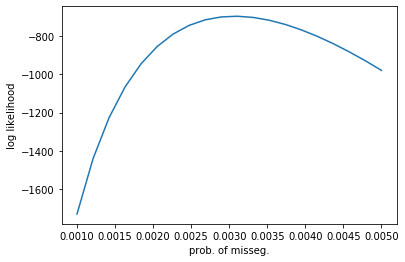

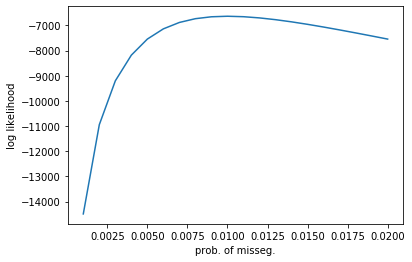

In [13]:
# Then we plot
xl = 'prob. of misseg.'
yl = 'log likelihood'

plt.figure()
plt.plot(pLow,likeLow)
plt.xlabel(xl)
plt.ylabel(yl)

plt.figure()
plt.plot(pHigh,likeHigh)
plt.xlabel(xl)
plt.ylabel(yl)

As we can see, these inferred likelihoods indeed agree quite well with the actual values

In [15]:
print(lowIndData.params)
print(highIndData.params)

{'n_cells': 10000, 'n_chrom': 92, 'p_misseg': 0.003}
{'n_cells': 10000, 'n_chrom': 92, 'p_misseg': 0.01}
